In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score ,accuracy_score


In [3]:
def perform_clustering(image):
    
    num_clusters = 2
    
    pixel_values = image.reshape((-1, 3))
    
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pixel_values)
    
    labels = kmeans.labels_
    
    segmented_image = labels.reshape(image.shape[:2])
    
    return segmented_image

In [4]:

# خواندن تصاویر
image_a = cv2.imread('a.png')
image_b = cv2.imread('b.png')

# اجرای خوشه‌بندی بر روی هر تصویر
segmented_image_a = perform_clustering(image_a)
segmented_image_b = perform_clustering(image_b)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
print(f"accuracy_score: {accuracy_score(segmented_image_a.flatten(),segmented_image_b.flatten())}")
print(f"NMI: {normalized_mutual_info_score(segmented_image_a.flatten(),segmented_image_b.flatten())}")

accuracy_score: 0.9117756881283935
NMI: 0.5286173665885622


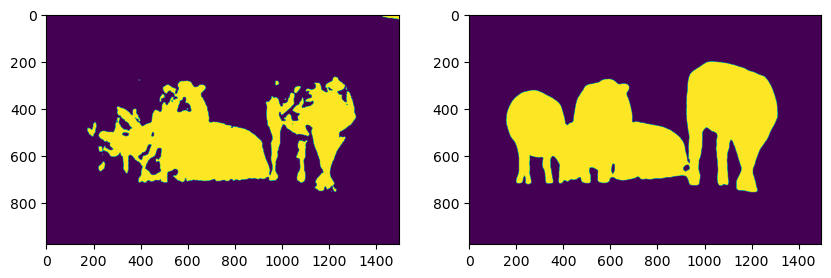

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

axes[0].imshow(segmented_image_a )
axes[1].imshow(segmented_image_b)

In [13]:
def perform_clustering2(image, mask):
    # تعداد خوشه‌ها (دو خوشه برای foreground و background)
    num_clusters = 2
    
    # ایجاد ماسک بر اساس اطلاعات بیشتر (Mask)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    
    # تبدیل تصویر به آرایه numpy
    pixel_values = masked_image.reshape((-1, 3))
    
    # اجرای الگوریتم K-Means بر روی پیکسل‌های تصویر
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pixel_values)
    
    # دریافت برچسب‌های خوشه‌ها
    labels = kmeans.labels_
    
    # بازگرداندن ابعاد تصویر
    segmented_image = labels.reshape(image.shape[:2])
    
    return segmented_image

In [14]:
# خواندن تصاویر
image_a = cv2.imread('a.png')

# خواندن ماسک (به عنوان مثال: ماسک سفید بر روی زمینه)
mask = cv2.imread('b.png', cv2.IMREAD_GRAYSCALE)

# اجرای خوشه‌بندی بر روی هر تصویر با Mask
segmented_image_a = perform_clustering2(image_a, mask)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
print(f"accuracy_score: {accuracy_score(segmented_image_a.flatten(),segmented_image_b.flatten())}")
print(f"NMI: {normalized_mutual_info_score(segmented_image_a.flatten(),segmented_image_b.flatten())}")

accuracy_score: 0.9114207902985458
NMI: 0.5588275943850448
